Kruskal-Wallis test (Liver Metastases): stat=4.94, p=0.1760
Kruskal-Wallis test (Liver Abscesses): stat=4.62, p=0.2017


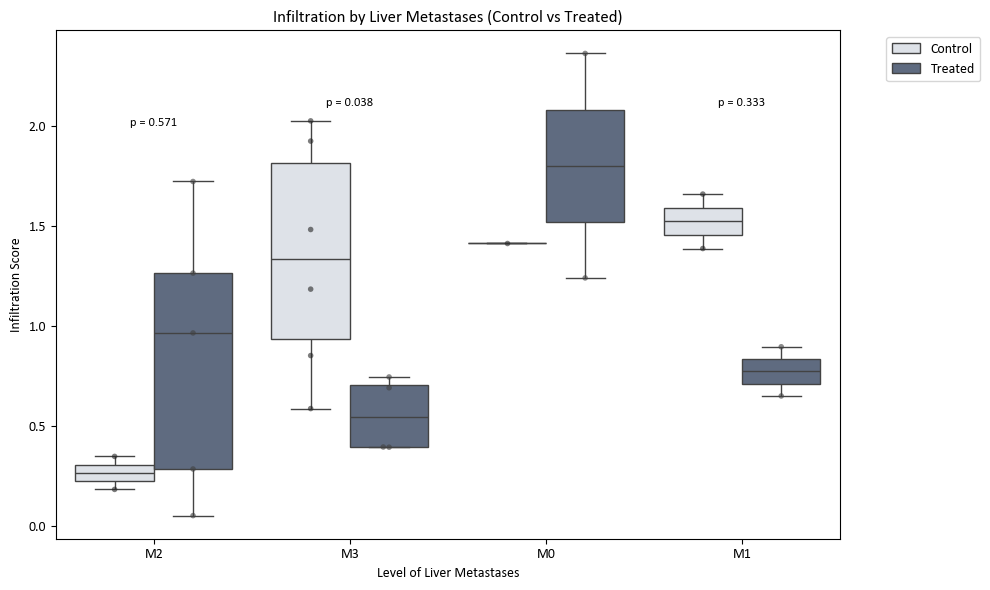

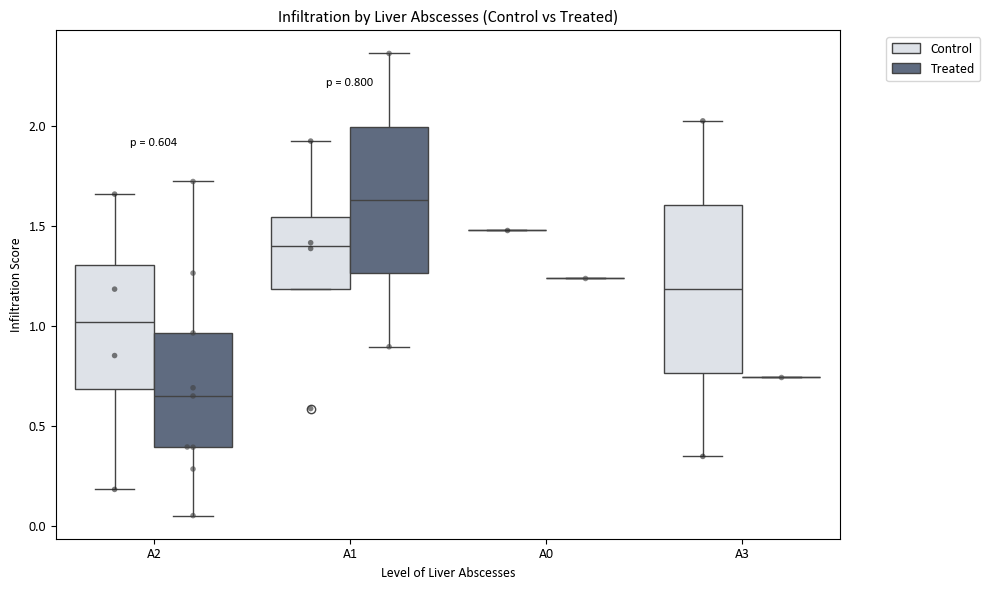

In [1]:
from scipy.stats import kruskal, mannwhitneyu
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd

# Load data from Excel
df = pd.read_excel('Infiltration vs Metastases_abscesses.xlsx')

# ----- Kruskal-Wallis test for liver metastases -----
metastases_groups = [df[df['Liver metastases'] == level]['Infiltration_score'] for level in df['Liver metastases'].unique()]
stat, p = kruskal(*metastases_groups)
print(f"Kruskal-Wallis test (Liver Metastases): stat={stat:.2f}, p={p:.4f}")

# ----- Kruskal-Wallis test for liver abscesses -----
abscesses_groups = [df[df['Liver abscesses'] == level]['Infiltration_score'] for level in df['Liver abscesses'].unique()]
kruskal_result_abscesses = kruskal(*abscesses_groups)
print(f"Kruskal-Wallis test (Liver Abscesses): stat={kruskal_result_abscesses.statistic:.2f}, p={kruskal_result_abscesses.pvalue:.4f}")

# ----- Visualization: Infiltration vs Liver Metastases -----
plt.rcParams['font.family'] = 'Calibri'
colors = ["#DCE1EA", "#5A6A85"]

plt.figure(figsize=(10, 6))
sns.boxplot(x='Liver metastases', y='Infiltration_score', hue='Group', data=df, palette=colors)
sns.swarmplot(x='Liver metastases', y='Infiltration_score', hue='Group', data=df,
              dodge=True, palette='dark:.25', size=4, alpha=0.6)

# Remove duplicate legend
handles, labels = plt.gca().get_legend_handles_labels()
plt.legend(handles[:2], labels[:2], bbox_to_anchor=(1.05, 1), loc='upper left')

# Add p-value annotations (Mann-Whitney U test) per category
metastases_levels = df['Liver metastases'].unique()
custom_heights = [2.0, 2.1, -1, 2.1]  # Manually defined Y positions

for i, level in enumerate(metastases_levels):
    sub = df[df['Liver metastases'] == level]
    control_vals = sub[sub['Group'] == 'Control']['Infiltration_score']
    treated_vals = sub[sub['Group'] == 'Treated']['Infiltration_score']
    if len(control_vals) > 1 and len(treated_vals) > 1:
        stat, p = mannwhitneyu(control_vals, treated_vals, alternative='two-sided')
        plt.text(i, custom_heights[i], f"p = {p:.3f}", ha='center', fontsize=9)

plt.xlabel("Level of Liver Metastases")
plt.ylabel("Infiltration Score")
plt.title("Infiltration by Liver Metastases (Control vs Treated)")
plt.tight_layout()
# plt.savefig("Infiltration_vs_Liver_Metastases.png", dpi=300, bbox_inches='tight')
plt.show()

# ----- Visualization: Infiltration vs Liver Abscesses -----
plt.rcParams['font.family'] = 'Calibri'
colors = ["#DCE1EA", "#5A6A85"]

plt.figure(figsize=(10, 6))
sns.boxplot(x='Liver abscesses', y='Infiltration_score', hue='Group', data=df, palette=colors)
sns.swarmplot(x='Liver abscesses', y='Infiltration_score', hue='Group', data=df,
              dodge=True, palette='dark:.25', size=4, alpha=0.6)

# Remove duplicate legend
handles, labels = plt.gca().get_legend_handles_labels()
plt.legend(handles[:2], labels[:2], bbox_to_anchor=(1.05, 1), loc='upper left')

# Add p-value annotations (Mann-Whitney U test) per category
abscess_levels = df['Liver abscesses'].unique()
custom_heights = [1.9, 2.2, 2.1, 1]  # Manually defined Y positions

for i, level in enumerate(abscess_levels):
    sub = df[df['Liver abscesses'] == level]
    control_vals = sub[sub['Group'] == 'Control']['Infiltration_score']
    treated_vals = sub[sub['Group'] == 'Treated']['Infiltration_score']
    if len(control_vals) > 1 and len(treated_vals) > 1:
        stat, p = mannwhitneyu(control_vals, treated_vals, alternative='two-sided')
        plt.text(i, custom_heights[i], f"p = {p:.3f}", ha='center', fontsize=9)

plt.xlabel("Level of Liver Abscesses")
plt.ylabel("Infiltration Score")
plt.title("Infiltration by Liver Abscesses (Control vs Treated)")
plt.tight_layout()
# plt.savefig("Infiltration_vs_Liver_Abscesses.png", dpi=300, bbox_inches='tight')
plt.show()
